## Visualizing Results of the Deletion Capacity Experiment

These are the results of the deletion capacity experiment. 

At a high level, we're seeing very conservative regret bounds for the Memory Pair. This means that we're requiring large sample complexity in return for a very low deletion capacity.

It's also worth noting that our sample complexity (bar for a good learner) increases as the data wiggles more. When the Lipschitz constant and upper-bound on the Hessian are high, the sample complexity jumps and the amount of noise injected to the model becomes destabilizingly high.

Goals:
- Analyze the simulation results from the experiment runs and visualize the cumulative regret
- Focus on $\widehat{G}$ such that we can see its impact on the downstream stability of the learner
- Investigate alternative methods of privacy accounting. Can we get tigheter regret bounds such that we don't inject so much noise into the parameter estimates.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generate a function that ingests the run results into a single dataframe

def ingest_run_results(file_paths):
    """
    Ingests run results from multiple CSV files into a single DataFrame.
    
    Parameters:
    file_paths (list of str): List of file paths to the CSV files.
    
    Returns:
    pd.DataFrame: Combined DataFrame containing all run results.
    """
    dataframes = []

    for file_path in file_paths:
        df = pd.read_csv(file_path)
        # Optionally, you can add a column to identify the source file
        df['source_file'] = file_path
        # convert index to step
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'step'}, inplace=True)
        # Ensure 'step' is an integer
        df['step'] = df['step'].astype(int)
        dataframes.append(df)
    
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [3]:
# collect file paths for the run results
file_paths = [
    "runs/0_memorypair.csv",
    "runs/1_memorypair.csv",
    "runs/2_memorypair.csv",
    "runs/3_memorypair.csv",
    "runs/4_memorypair.csv",
    "runs/5_memorypair.csv",
    "runs/6_memorypair.csv",
    "runs/7_memorypair.csv",
    "runs/8_memorypair.csv",
    "runs/9_memorypair.csv"
]
# ingest the run results
run_results_df = ingest_run_results(file_paths)

In [4]:
run_results_df
# replace source file with run number
run_results_df['run'] = run_results_df['source_file'].str.extract(r'(\d+)_memorypair.csv')
run_results_df['run'] = run_results_df['run'].astype(int)

In [5]:
run_1 = run_results_df[run_results_df['run'] == 1]
run_1
run_1.describe()

/workspaces/unlearning-research-meta/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/workspaces/unlearning-research-meta/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,step,event,regret,acc,eps_spent,capacity_remaining,run
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.0,100000.0,100000.0
mean,49999.500000,49999.500000,985.082351,1.680463e-01,0.0,inf,1.0
std,28867.657797,28867.657797,573.528628,5.001905e-01,0.0,NaN,0.0
min,0.000000,0.000000,0.000000,8.200690e-07,0.0,inf,1.0
25%,24999.750000,24999.750000,494.394368,5.956765e-02,0.0,NaN,1.0
50%,49999.500000,49999.500000,1001.661181,1.269968e-01,0.0,NaN,1.0
75%,74999.250000,74999.250000,1485.733826,2.201052e-01,0.0,NaN,1.0
max,99999.000000,99999.000000,1963.776151,5.294889e+01,0.0,inf,1.0


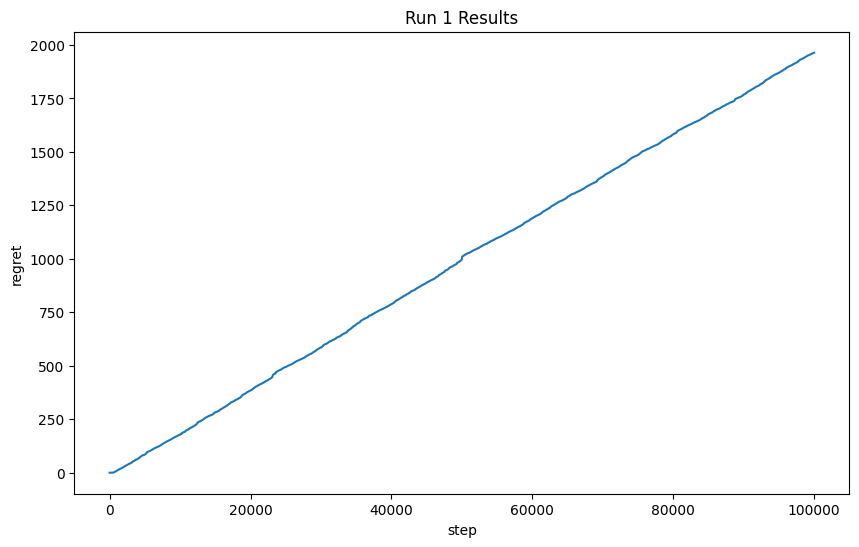

In [7]:
# visualize the results for run 1   
plt.figure(figsize=(10, 6))
sns.lineplot(data=run_1, x='step', y='regret' )
plt.title('Run 1 Results')
plt.show()

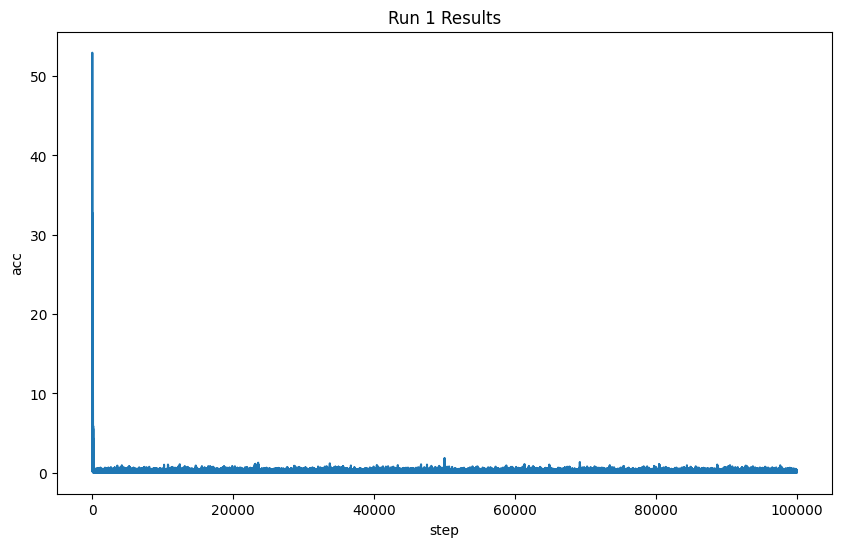

In [8]:
# visualize the results for run 1   
plt.figure(figsize=(10, 6))
sns.lineplot(data=run_1, x='step', y='acc' )
plt.title('Run 1 Results')
plt.show()

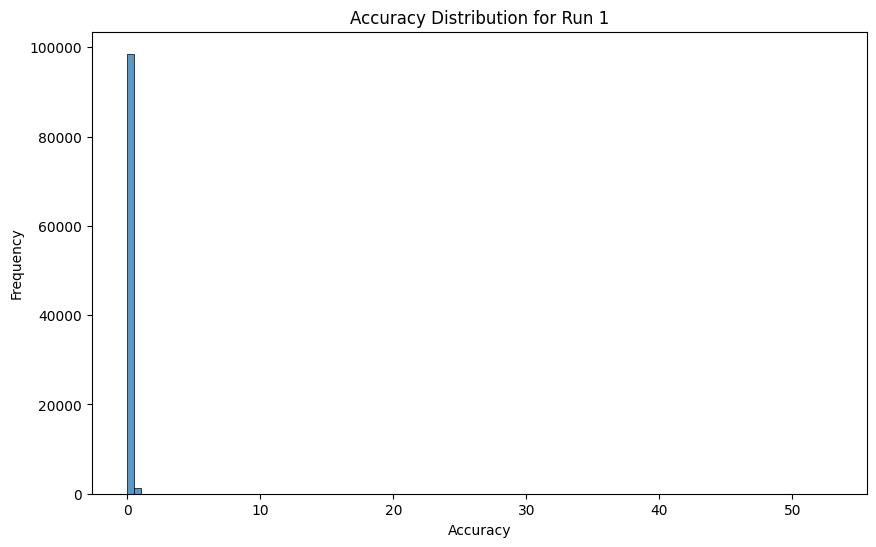

In [14]:
# display a histogram of accuracy
plt.figure(figsize=(10, 6))
sns.histplot(run_1['acc'], bins=100)
plt.title('Accuracy Distribution for Run 1')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

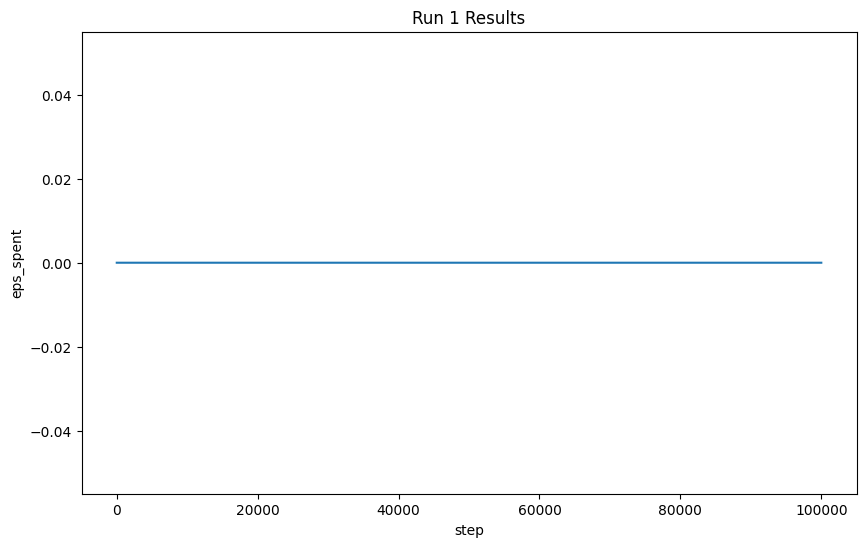

In [9]:
# visualize the results for run 1   
plt.figure(figsize=(10, 6))
sns.lineplot(data=run_1, x='step', y='eps_spent' )
plt.title('Run 1 Results')
plt.show()